In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Loading the habermann.csv into pandas dataframe
column_name = ['Age','Operation_Year','Axil_Nodes','Surv_Status']
habermann = pd.read_csv('haberman.csv',header = None, names=column_name)

In [7]:
habermann.head(1) #first, Surv_Status = 1 means can survive

,Age,Operation_Year,Axil_Nodes,Surv_Status
0,30,64,1,1


In [8]:
habermann.tail(1) #last  , Surv_Status = 2 means can't survive

,Age,Operation_Year,Axil_Nodes,Surv_Status
305,83,58,2,2


In [10]:
print(habermann.shape) #306 rows and 4 columns

(306, 4)


In [11]:
print(habermann.columns) #features

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')


In [12]:
habermann["Surv_Status"].value_counts() #data points in each class

1    225
2     81
Name: Surv_Status, dtype: int64

In [13]:
# Objective is whether the patient can survive with the give treatment for cancer

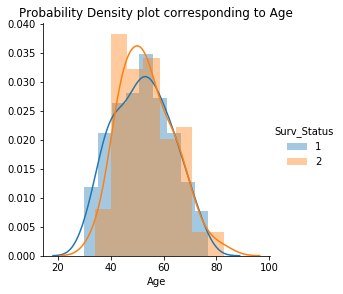

In [19]:
#Univariate Analysis - using one feature for our entire analysis

#Probability Density Function
#Age
sns.FacetGrid(habermann,hue='Surv_Status',size=4).map(sns.distplot,'Age').add_legend();
plt.title('Probability Density plot corresponding to Age')
plt.show();

In [16]:
#Analysis from the above plot
# 1.The histogram overlaps each other.
# 2.It looks like people aged 40-60 are more likely to die (orange area , Surv_Status=2)
# 3.People less than 40 years of age are more likely to survive(blue area, Surv_Status=1)

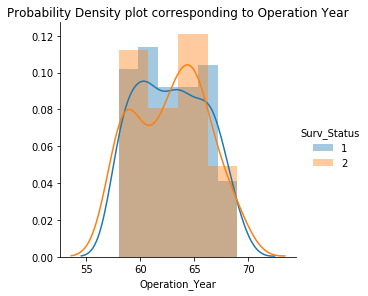

In [20]:
#Operation Year
sns.FacetGrid(habermann,hue='Surv_Status',size=4).map(sns.distplot,'Operation_Year').add_legend();
plt.title("Probability Density plot corresponding to Operation Year")
plt.show();

In [21]:
#Analysis from the above plot
# 1.The overlapping of the two classes makes the plot vague
# 2.It is seen that patients aged between 60 to 65 who were operated died

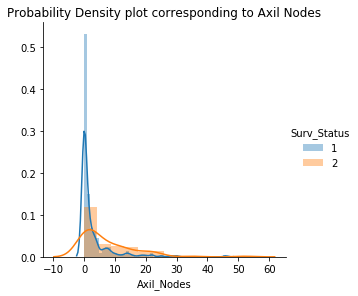

In [22]:
#Axil Nodes
sns.FacetGrid(habermann,hue='Surv_Status',size=4).map(sns.distplot,'Axil_Nodes').add_legend();
plt.title("Probability Density plot corresponding to Axil Nodes")
plt.show();

In [23]:
#Analysis from the above plot
# 1.Partial overlapping observed
# 2.Patients having 0 Axil Nodes will survive

In [25]:
#Cumulative Distribution Function

In [27]:
class_1 = habermann.loc[habermann["Surv_Status"]==1] # patient will survive
class_2 = habermann.loc[habermann["Surv_Status"]==2] # patient will die

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


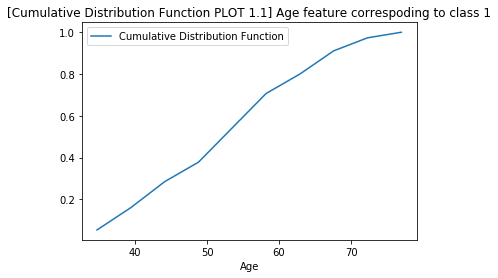

In [30]:
# Age feature correspoding to class 1

counts, bin_edges = np.histogram(class_1['Age'],bins=10,density=True) 
#cumulative sum of pdf is cdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='Cumulative Distribution Function')
plt.xlabel('Age')
plt.title("[Cumulative Distribution Function PLOT 1.1] Age feature correspoding to class 1")
plt.legend()
plt.show()

In [31]:
#Analysis from the above plot
# 1.Patients Aged between 50 to 60 have greater chance of survival
# 2. Almost 90% of patients have survived whose age <=70

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


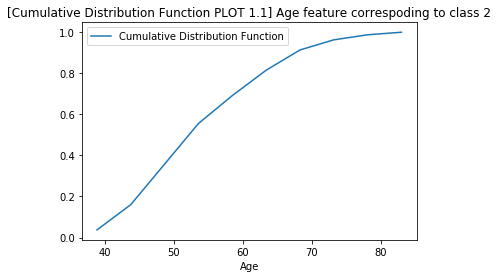

In [32]:
# Age feature correspoding to class 2
counts, bin_edges = np.histogram(class_2['Age'],bins=10,density=True) 
#cumulative sum of pdf is cdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='Cumulative Distribution Function')
plt.xlabel('Age')
plt.title("[Cumulative Distribution Function PLOT 1.1] Age feature correspoding to class 2")
plt.legend()
plt.show()

In [33]:
#Analysis from the above plot
# 1. It is seen that around 75% of the patients who died within 5 years have age <=60

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


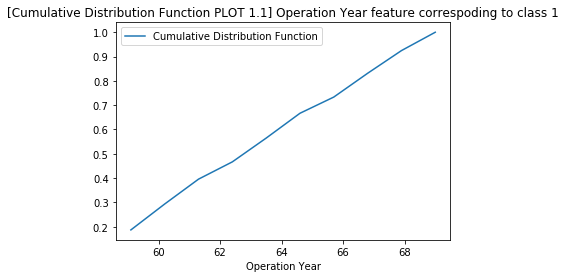

In [41]:
# Operation year feature correspoding to class 1
counts, bin_edges = np.histogram(class_1['Operation_Year'],bins=10,density=True) 
#cumulative sum of pdf is cdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='Cumulative Distribution Function')
plt.xlabel('Operation Year')
plt.title("[Cumulative Distribution Function PLOT 1.1] Operation Year feature correspoding to class 1")
plt.legend()
plt.show()

In [36]:
#Analysis from the above plot
# 1. It is observed that 60% patients are undergoing surgery before the year 1964 and survived

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


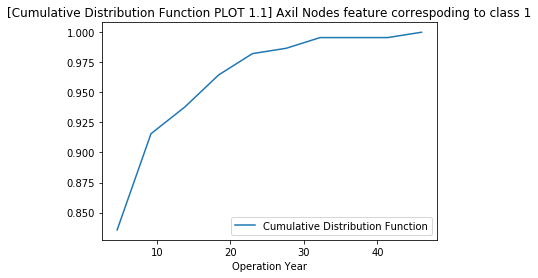

In [39]:
# Axil Nodes feature correspoding to class 1
counts, bin_edges = np.histogram(class_1['Axil_Nodes'],bins=10,density=True) 
#cumulative sum of pdf is cdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='Cumulative Distribution Function')
plt.xlabel('Operation Year')
plt.title("[Cumulative Distribution Function PLOT 1.1] Axil Nodes feature correspoding to class 1")
plt.legend()
plt.show()

In [38]:
#Analysis from the above plot
# 1.It is seen that almost 85% of patients who survived have Axil Nodes <=10. Hence lower the Axil Nodes , greater the chance of survival

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


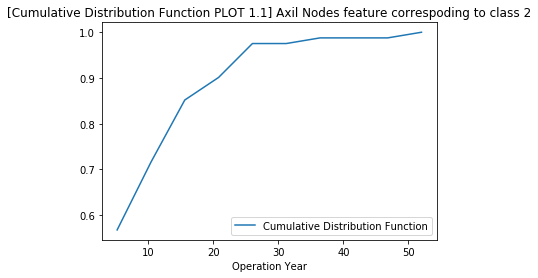

In [40]:
# Axil Nodes feature correspoding to class 2
counts, bin_edges = np.histogram(class_2['Axil_Nodes'],bins=10,density=True) 
#cumulative sum of pdf is cdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='Cumulative Distribution Function')
plt.xlabel('Operation Year')
plt.title("[Cumulative Distribution Function PLOT 1.1] Axil Nodes feature correspoding to class 2")
plt.legend()
plt.show()

In [42]:
#Analysis from the above plot
# 1. It is seen that around 95% of the patients who died within 5 years after surgery have Axil Nodes <=27

In [43]:
# BOX PLOT


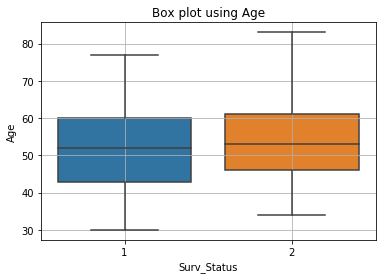

In [44]:
#Using Age feature
sns.boxplot(x='Surv_Status',y='Age',data=habermann)
plt.grid()
plt.title("Box plot using Age")
plt.show()

In [45]:
#Analysis from the above plot
#1. Almost 95% of the points are overlapping with one median so we need more features to explain the exact scenario

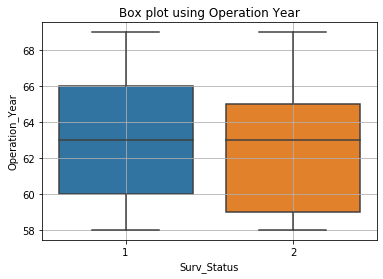

In [47]:
#Using Operation Year feature
sns.boxplot(x='Surv_Status',y='Operation_Year',data=habermann)
plt.grid()
plt.title("Box plot using Operation Year")
plt.show()

In [48]:
#Analysis from the above plot
# 1. Almost 80% of the points are overlapping with one median so we need more features to explain the exact scenario

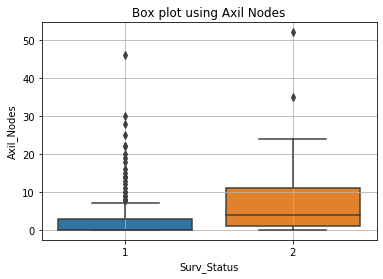

In [49]:
#Using Operation Year feature
sns.boxplot(x='Surv_Status',y='Axil_Nodes',data=habermann)
plt.grid()
plt.title("Box plot using Axil Nodes")
plt.show()

In [50]:
#Analysis from the above plot
# 1. Class 1 have outliers and also around 50% of the patients have Axil Nodes <=3

In [51]:
# Violin Plot


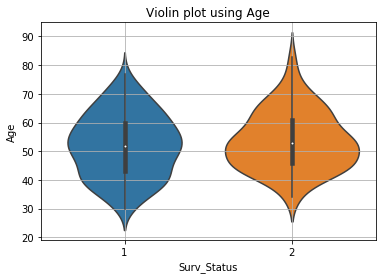

In [54]:
#Using Age feature

sns.violinplot(x="Surv_Status",y="Age",data=habermann)
plt.grid()
plt.title("Violin plot using Age")
plt.show()

In [53]:
#Analysis from the above plot
# 1. Overlapping is visible in both classes upto 95%
# 2. Age feature is again not sufficient to get a clear intuision about the plot 

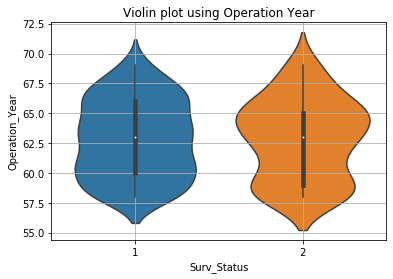

In [55]:
#Using Operation Year feature

sns.violinplot(x="Surv_Status",y="Operation_Year",data=habermann)
plt.grid()
plt.title("Violin plot using Operation Year")
plt.show()

In [56]:
#Analysis from the above plot
# 1. Overlapping is visible in both classes upto 90%
# 2. Operation Year feature also is not sufficient to get a clear intuision about the plot 

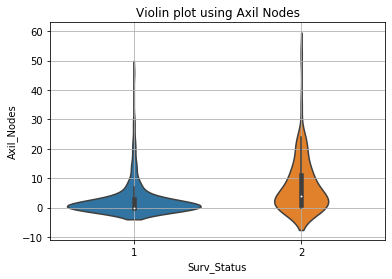

In [59]:
#Using Axil Node feature

sns.violinplot(x="Surv_Status",y="Axil_Nodes",data=habermann)
plt.grid()
plt.title("Violin plot using Axil Nodes")
plt.show()

In [60]:
#Analysis from the above plot
# 1. The survived patients have axil node = 0
# 2. Patients who died have axil node >=1, as the number of axil nodes increases , the patient is likely to not survive

In [61]:
# Bivariate Analysis - using two features for analysis


In [62]:
# Scatter Plot


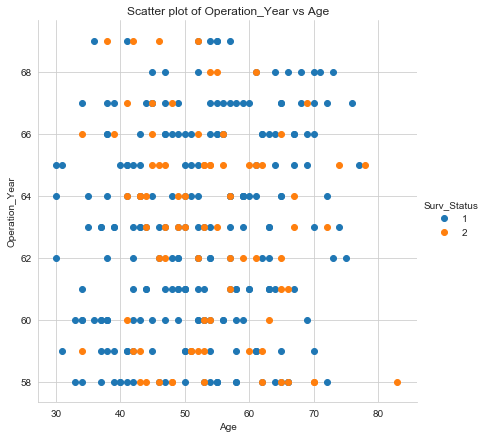

In [64]:
#Using Age and Operation year features
sns.set_style("whitegrid")
sns.FacetGrid(habermann,hue="Surv_Status",size=6).map(plt.scatter,"Age","Operation_Year").add_legend();
plt.title("Scatter plot of Operation_Year vs Age");
plt.show();

In [65]:
#Analysis from the above plot
# 1. Here there is an overlap of 80-90% so we can't classify survival status based on these two features

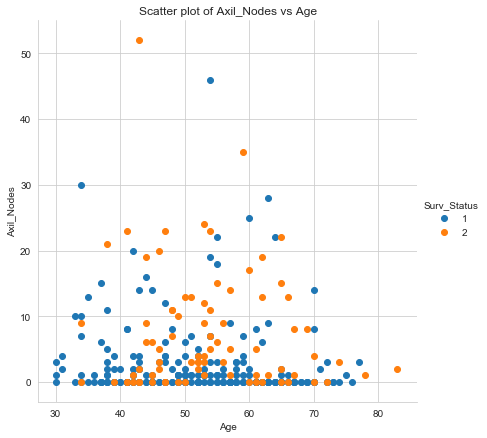

In [66]:
#Using Age and Axil Node features
sns.set_style("whitegrid")
sns.FacetGrid(habermann,hue="Surv_Status",size=6).map(plt.scatter,"Age","Axil_Nodes").add_legend();
plt.title("Scatter plot of Axil_Nodes vs Age");
plt.show();

In [68]:
#Analysis from the above plot
# 1. Here there is an overlap of 80-85% and few outliers so we can't classify survival status based on these two features

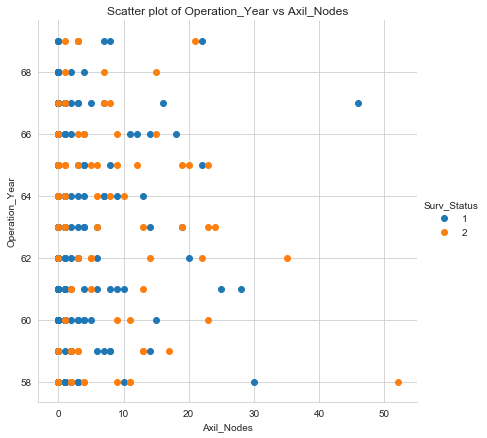

In [69]:
#Using Operation Year and Axil Node features
sns.set_style("whitegrid")
sns.FacetGrid(habermann,hue="Surv_Status",size=6).map(plt.scatter,"Axil_Nodes","Operation_Year").add_legend();
plt.title("Scatter plot of Operation_Year vs Axil_Nodes");
plt.show();

In [70]:
#Analysis from the above plot
# 1. Here there is an overlap of 90-95% so we can't classify survival status based on these two features 

In [71]:
# Pair Plot


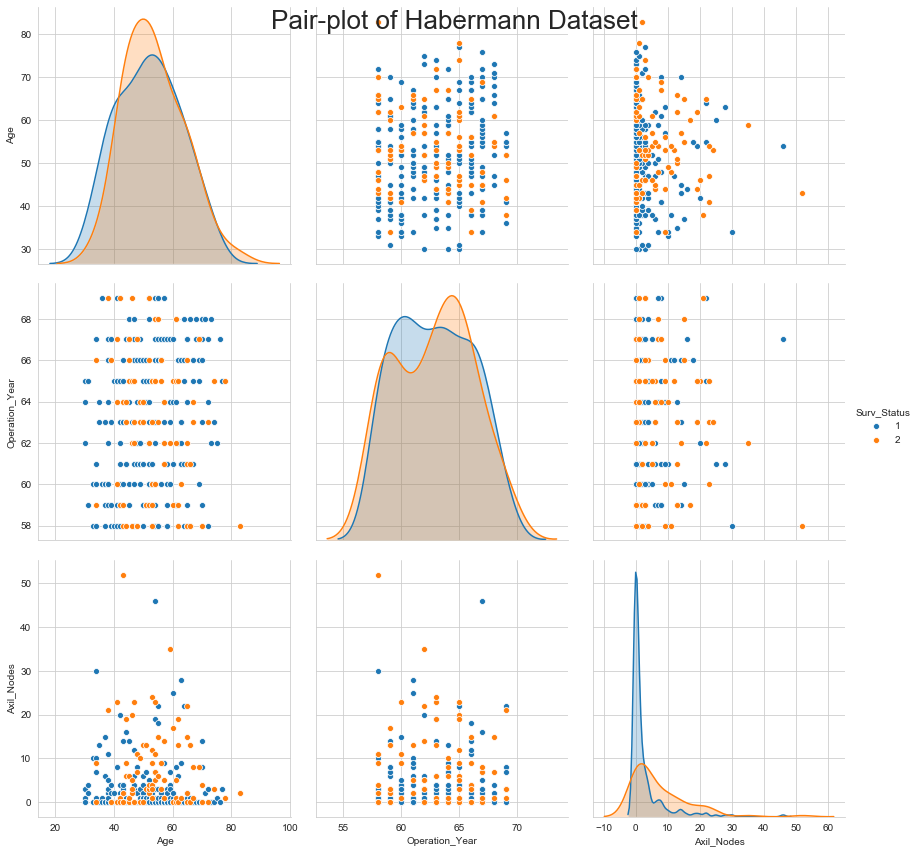

In [75]:
# Pair-wise scatter plot

plt.close()
sns.set_style("whitegrid")
sns.pairplot(habermann,hue="Surv_Status",x_vars=['Age','Operation_Year','Axil_Nodes'],y_vars=['Age','Operation_Year','Axil_Nodes'],size=4);
plt.suptitle("Pair-plot of Habermann Dataset",size=26);
plt.show();


In [76]:
#Analysis from the above plot
# 1.It is difficult to analyse this data using these 3 features as classes 1 and 2 are overlapping 85-90% times
# 2. Classes are linearly inserparable due to the overlapping
# 3. We need to collect more features to analyse it better
# 4. We need to use non linear models 
# 5. Axil_Nodes is the most useful feature